Edgar Lopez Valdes
A01339939

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plt

#Obtenemos el conjunto de datos
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")


In [2]:
#Vemos las primeras 5 líneas
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
#Forma del set
df.shape

(30000, 25)

In [4]:
#Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [7]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Verificamos datos faltantes

df.isnull().values.any()

True

In [9]:
df.isna().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [10]:
#Just droping all rows with null info
df.dropna(inplace = True)
df.isnull().values.any()


False

In [11]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


-X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
-X2: Gender (1 = male; 2 = female). 
-X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
-X4: Marital status (1 = married; 2 = single; 3 = others). 
-X5: Age (year). 
-X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. 
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 9 = payment delay for nine months and above. 
-X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
-X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amou

In [12]:
'''
De los valores obtenidos entendemos que hay grandes diferencias particularmente en cuanto a la desviacion estandar, lo que nos da 
a entender que de acuerdo al nivel de ingresos por cada registro
la cantidad de creditos es muy distinta. Tiene sentido ya que el credito debe ser
acorde al salario personal.
Toda la información resulta muy valiosa para predecir la aprobación de un credito, 
además de que para este caso en particular podemos pensar en tecnicas de estandarizacion
o normalizacion para los valores que son muy diferentes.

'''

In [13]:
num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [14]:
df[num_cols]

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [15]:
#Se tranforman las variables numericas con el standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(df[num_cols])


var = np.cov(df[num_cols])
print(var)

[[1.63988174e+07 9.40339770e+07 7.24099562e+07 ... 1.84288743e+07
  5.40045090e+07 4.21616076e+07]
 [9.40339770e+07 5.68740532e+08 4.14557307e+08 ... 1.22405461e+08
  3.05877475e+08 2.00811250e+08]
 [7.24099562e+07 4.14557307e+08 3.49789619e+08 ... 1.05333879e+08
  2.88899932e+08 2.47267135e+08]
 ...
 [1.84288743e+07 1.22405461e+08 1.05333879e+08 ... 1.05548368e+08
  1.17294470e+08 1.07204869e+08]
 [5.40045090e+07 3.05877475e+08 2.88899932e+08 ... 1.17294470e+08
  9.92380294e+08 3.77809588e+08]
 [4.21616076e+07 2.00811250e+08 2.47267135e+08 ... 1.07204869e+08
  3.77809588e+08 3.80101246e+08]]


In [16]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(type(so))
print(so.size)

print(so[1:580])

<class 'pandas.core.series.Series'>
625
X18  X2     0.000297
X3   X15    0.000566
X15  X3     0.000566
X22  ID     0.000616
ID   X22    0.000616
              ...   
X13  X17    0.831570
X17  X14    0.853302
X14  X17    0.853302
X13  X16    0.859756
X16  X13    0.859756
Length: 579, dtype: float64


Los siguiente pares de variables tienen una alta correlacion

X17  X15    0.900940
X15  X17    0.900940
X14  X15    0.923968
X15  X14    0.923968
X14  X13    0.928321
X13  X14    0.928321
X16  X15    0.940141
X15  X16    0.940141
X16  X17    0.946194
X17  X16    0.946194
X13  X12    0.951480
X12  X13    0.951480

In [17]:
ndf = pd.DataFrame(df, columns=['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23'])

ndf.head()
sumVar = ndf.var().sum()
print(sumVar)

45450192693.29061


In [18]:
varPerNumCol = []
for (index, colName) in enumerate(num_cols):
  varPerNumCol.append(var[index][index])
print("Varianza:    ",sumVar.round(2))
for (index, varPer) in enumerate(varPerNumCol):
  propVar = ((varPer/sumVar)*100).round(2)
  print("Varianza",num_cols[index],":",propVar,"%")

Varianza:     45450192693.29
Varianza ID : 0.04 %
Varianza X1 : 1.25 %
Varianza X2 : 0.77 %
Varianza X3 : 0.79 %
Varianza X4 : 0.43 %
Varianza X5 : 1.0 %
Varianza X6 : 96.13 %
Varianza X7 : 0.88 %
Varianza X8 : 1.7 %
Varianza X9 : 0.07 %
Varianza X10 : 3.48 %
Varianza X11 : 5.81 %
Varianza X12 : 34.66 %
Varianza X13 : 1.67 %
Varianza X14 : 6.37 %
Varianza X15 : 0.62 %
Varianza X16 : 0.15 %
Varianza X17 : 22.64 %
Varianza X18 : 2.85 %
Varianza X19 : 1.65 %
Varianza X20 : 1.26 %
Varianza X21 : 1.09 %
Varianza X22 : 17.72 %
Varianza X23 : 0.7 %
Varianza Y : 0.69 %


In [20]:
ndf=df.dropna()
np.any(np.isnan(ndf))

False

In [21]:
pcs = PCA(n_components=5)
ndf.dropna()

Xt = pcs.fit_transform(ndf)

In [22]:
pcs.explained_variance_

array([2.77506527e+10, 1.34153689e+10, 1.38807573e+09, 7.69919637e+08,
       4.28481783e+08])

In [23]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,166585.271487,0.609568,0.609568
1,115824.733682,0.294681,0.904249
2,37256.888297,0.030490,0.934739
3,27747.425774,0.016912,0.951651
4,20699.801526,0.009412,0.961063


In [24]:
newSummary = pcsSummary.transpose()
newSummary.columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
newSummary = newSummary.round(2)
newSummary

,PC1,PC2,PC3,PC4,PC5
Standard deviation,166585.27,115824.73,37256.89,27747.43,20699.80
Proportion of variance,0.61,0.29,0.03,0.02,0.01
Cumulative proportion,0.61,0.90,0.93,0.95,0.96


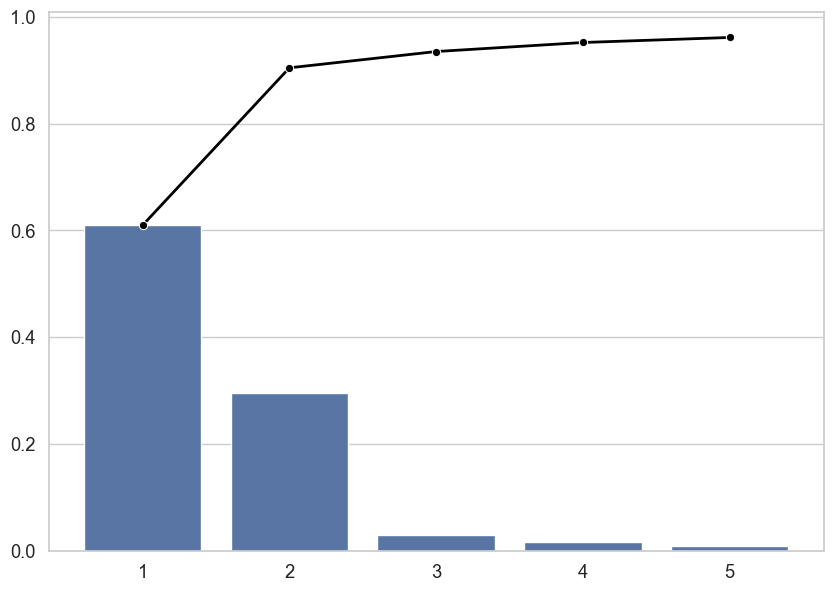

In [31]:
import seaborn as sns

pc_components = np.arange(pcs.n_components_) + 1


cusm = np.cumsum(pcs.explained_variance_ratio_)
vartio = pcs.explained_variance_ratio_
cusm
scree = sns.set(style = "whitegrid", font_scale = 1.2)
fig, ax = plt.subplots(figsize = (10,7))
scree = sns.barplot(x = pc_components, y = vartio, color = 'b')
scree = sns.lineplot(x = pc_components - 1, y = cusm, color='black', linestyle = '-', linewidth = 2, marker='o')

Encontramos que la mayor varianza está en los primeros componentes lo que nos ayuda a entender la importancia que tienen estos sobre las predicciones finales. En realidad podriamos pensar que si la mayor cantidad de varianza se maximiza sobre los primeros dos tal vez los otros no estén entregando información relevante al análisis.

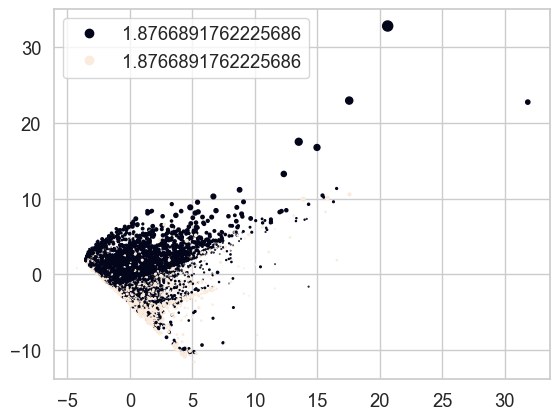

In [ ]:
import matplotlib.pyplot as plt
plot = plt.scatter(Xt[:,0], Xt[:,1], Xt[:,2], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(ndf['Y']))
plt.show()

In [27]:
pcsSummary1 = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary1 = pcsSummary1.round(2)
pcsSummary1 = pcsSummary1.transpose()

pcsSummary1.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary1.columns)+1)]
pcsSummary1.columns

pcsCompsDf = pd.DataFrame(pcs.components_.transpose(), columns = pcsSummary1.columns, index = ndf.columns)
pcsCompsDf

,PC1,PC2,PC3,PC4,PC5
ID,1.536960e-03,7.456424e-04,2.017720e-03,5.077240e-03,-1.150450e-02
X1,4.910516e-01,8.693264e-01,-2.055997e-02,-1.841782e-02,-4.402501e-02
X2,-3.601357e-08,1.739100e-07,3.261672e-07,-2.475813e-08,-3.678391e-07
X3,-3.668482e-07,-1.499662e-06,-9.711398e-07,2.099907e-07,4.448257e-07
X4,-1.917006e-07,-4.003319e-07,7.364499e-08,9.582887e-08,6.648499e-07
X5,5.564697e-06,8.290453e-06,-4.099722e-06,-2.331190e-07,-4.944418e-06
X6,3.441399e-07,-3.804273e-06,-4.169357e-07,-2.627816e-06,-3.345301e-06
X7,5.704154e-07,-4.620471e-06,-5.838878e-07,-2.670390e-06,-2.027821e-06
X8,5.846827e-07,-4.498715e-06,5.097080e-07,-1.789191e-06,-3.611572e-06
X9,6.675463e-07,-4.258008e-06,2.096641e-06,2.218761e-07,-4.410457e-06


<AxesSubplot: >

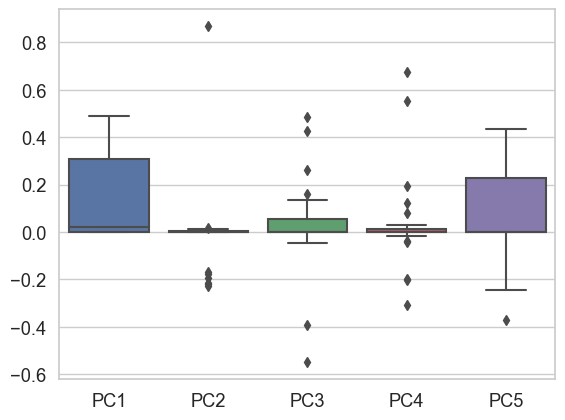

In [28]:
sns.boxplot(data=pcsCompsDf)

([<matplotlib.patches.Wedge at 0x12ba97e20>,
 [Text(1.075962358309037, 0.22870287165240302, 'PC5'),
  Text(0.7360436312779136, 0.8174593401847109, 'PC4'),
  Text(-0.3399187721714582, 1.046162142464278, 'PC3'),
  Text(-1.0759623315431446, -0.22870299757598414, 'PC2'),
  Text(0.5500001932481626, -0.9526278325909778, 'PC1')])

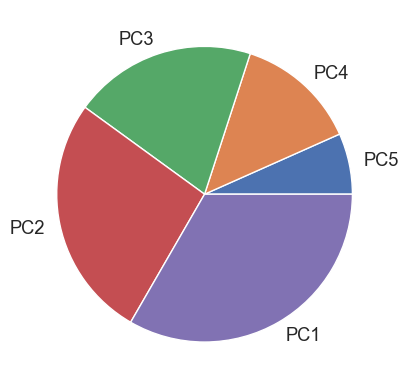

In [36]:
plt.pie(pc_components, labels =['PC5','PC4','PC3','PC2','PC1'])

En el boxplot vemos que si bien ahora logramos reducir los componentes de cerca de 20 a solo 5 aun se muestran valores atipicos, por lo que seguramente el modelo se encuentra subentrenado, o simplemente falta incluir un mayor numero de componentes. Tanto el histograma como en el pie volvemos a observar el peso que tienen los componentes sobre el resultado final del PCA. En el scatter vemos únicamente como están comportando los ratios de varianza para los primeros dos componentes, que como vimos maximizan la misma. En realidad no conocemos muy bien los factores que se están incluyendo dentro de cada uno de esos aunque sabemos que se encuentran entre los de menor correlación respecto a lo calculado al inicio.